# Data Tests notebook

This notebook is for interactively developing tests for datasets and datamodules

Author: Jacob A Rose  
Created on: Tuesday May 4th, 2021

In [1]:
from IPython.core.debugger import set_trace

import os
import types
os.environ['CUDA_VISIBLE_DEVICES'] = "4"
import numpy as np
import pytorch_lightning as pl
# from torchvision import models
import torchvision
import torch
# import timm
from rich import print
import matplotlib.pyplot as plt
from contrastive_learning.data.pytorch.pnas import PNASLightningDataModule
from contrastive_learning.data.pytorch.extant import ExtantLightningDataModule
from contrastive_learning.data.pytorch.common import DataStageError, colorbar

# from lightning_hydra_classifiers.callbacks.wandb_callbacks import WatchModelWithWandb, LogConfusionMatrixToWandb
# from lightning_hydra_classifiers.models.resnet import ResNet, get_scalar_metrics
# import lightning_hydra_classifiers
from torch import nn
import inspect
pl.trainer.seed_everything(seed=9)

Global seed set to 9


9

In [2]:
# data = PNASLightningDataModule(batch_size=16)
data = ExtantLightningDataModule(batch_size=16, num_workers=12)
# data.setup(stage='fit')

# data.setup(stage='test')

# data.setup(stage=None)

# try:
#     data.setup(stage='other')
#     print('success')
# except DataStageError as e:
#     print(e.with_traceback(None))

In [3]:
data.setup(stage='fit')
train_dataloader = data.get_dataloader(stage='train')
val_dataloader = data.get_dataloader(stage='val')
data.setup(stage='test')
test_dataloader = data.get_dataloader(stage='test')

# train_dataloader
#         if stage=='train': return self.train_dataloader()
#         if stage=='val': return self.val_dataloader()
#         if stage=='test': return self.test_dataloader()


In [4]:


# data.train_dataset.transform = None #data.default_train_transforms() #None
x, y = data.train_dataset[0]
# print(x.shape)

In [5]:
# from PIL import ImageOps

# print(x.max(), x.min())
# plt.imshow(ImageOps.invert(x))#.permute(1,2,0))

CPU times: user 35.8 s, sys: 7 s, total: 42.8 s
Wall time: 1min 27s


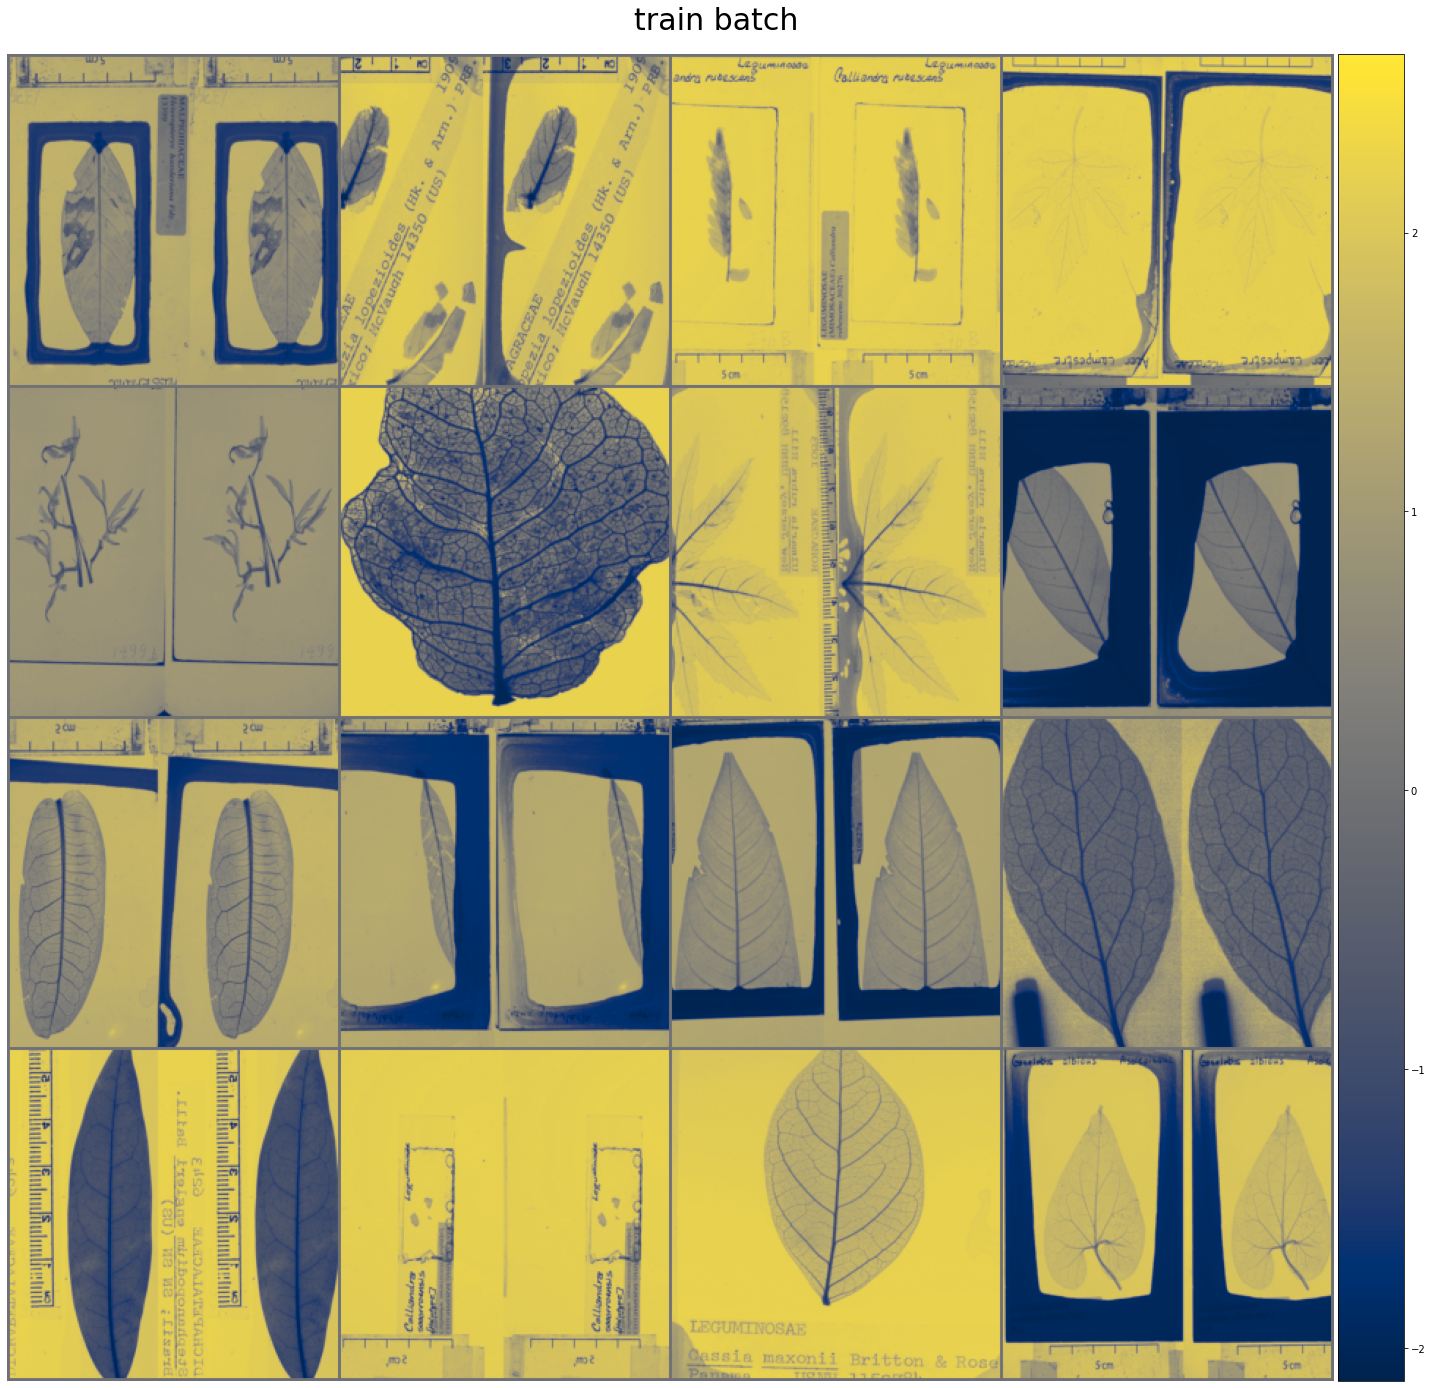

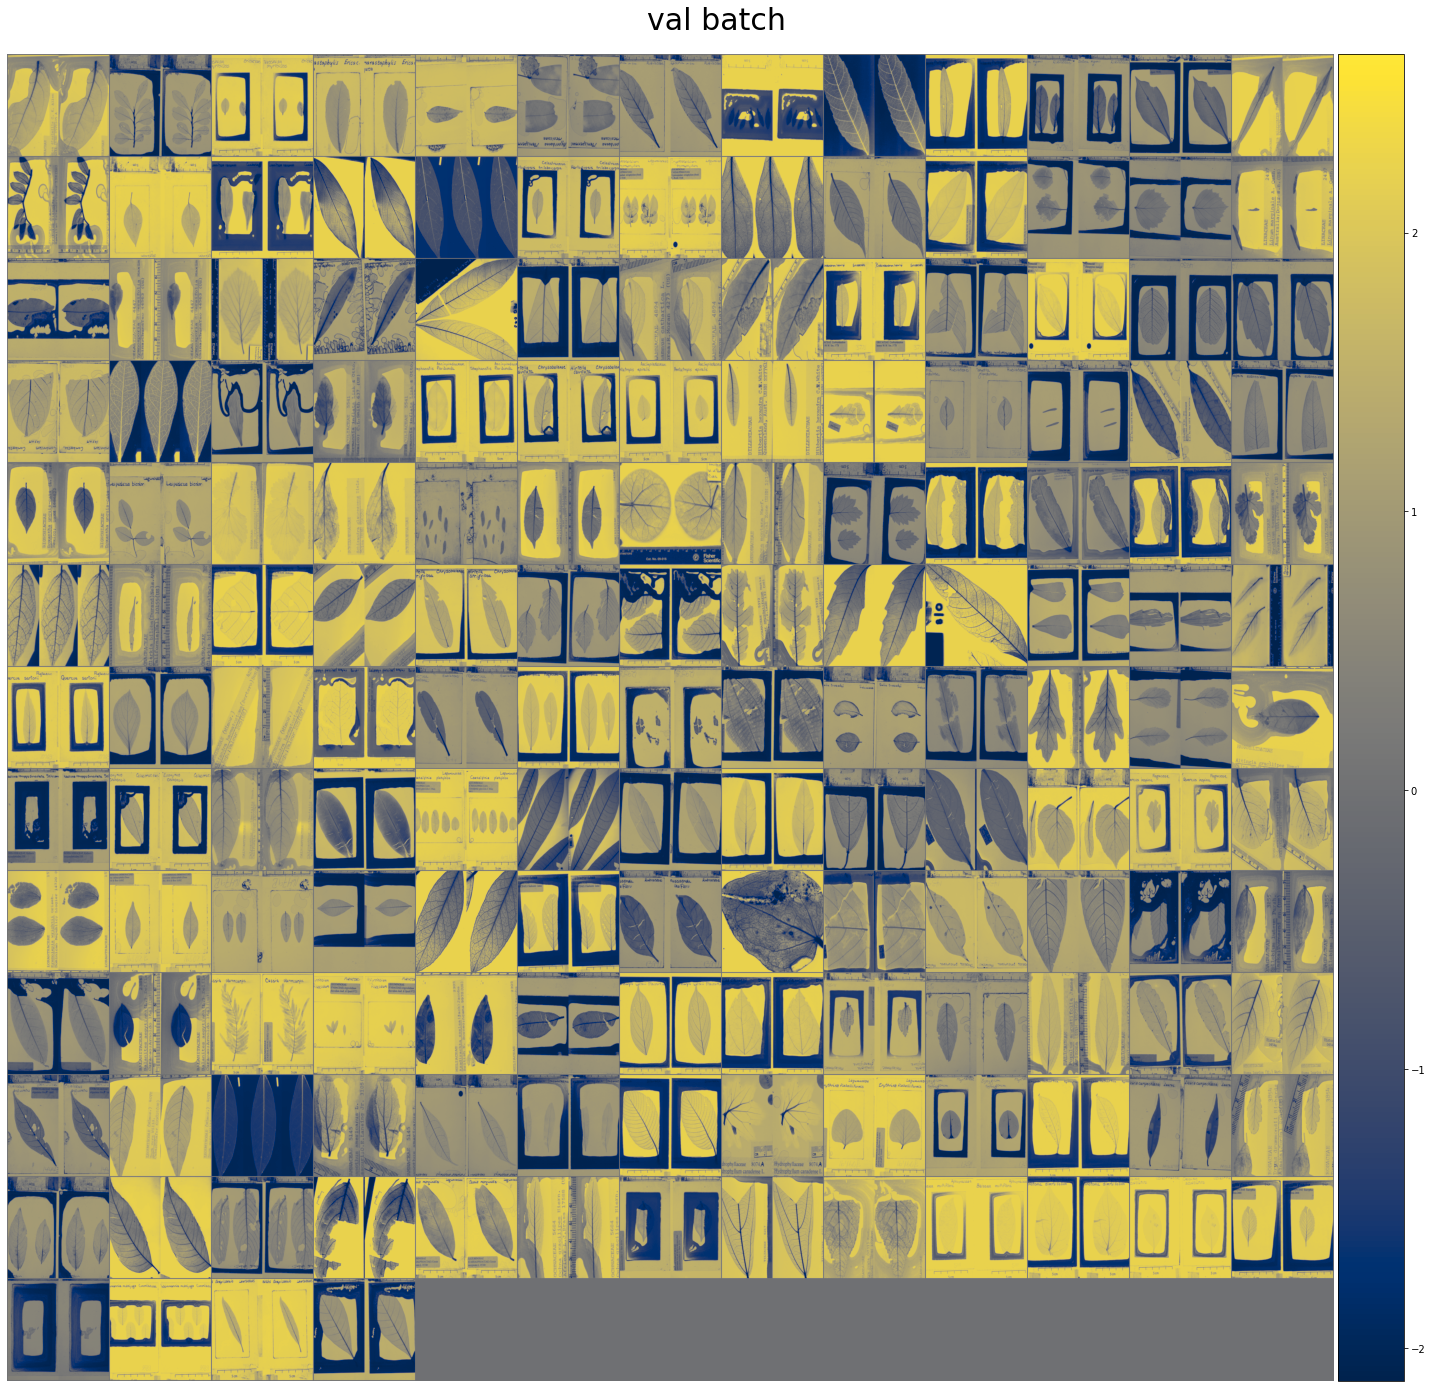

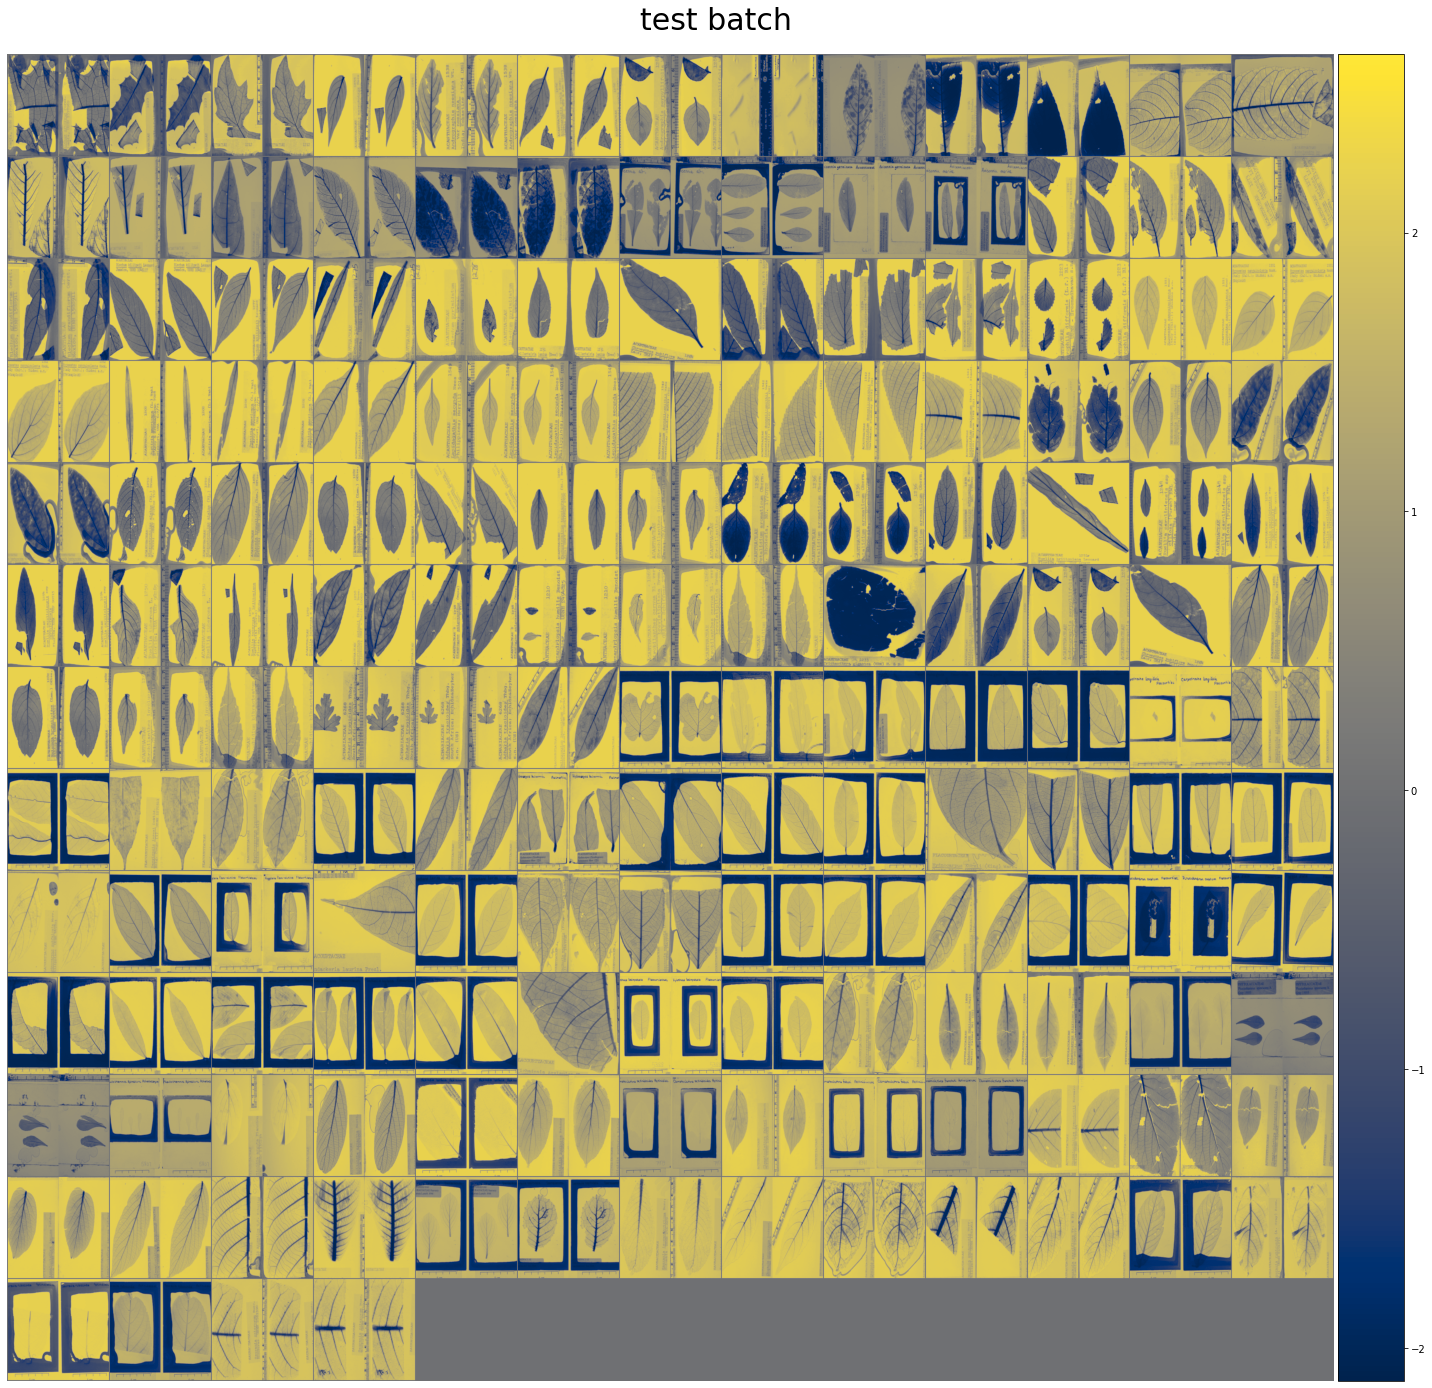

In [6]:
%%time
batch_idx = 0

data.show_batch('train', batch_idx=batch_idx)
# data.show_batch('train', cmap='plasma')
plt.savefig(f'ExtantLeaves v0_3 train batch {batch_idx}.png')

data.show_batch('val', batch_idx=batch_idx)
plt.savefig(f'ExtantLeaves v0_3 val batch {batch_idx}.png')

data.show_batch('test', batch_idx=batch_idx)
plt.savefig(f'ExtantLeaves v0_3 test batch {batch_idx}.png')
# data.show_batch('train', cmap='magma')
# data.show_batch('train', cmap='cividis')

In [9]:
self = data
stage = 'test'
batch_idx = 0

x, y = self.get_batch(stage=stage, batch_idx=batch_idx)

x = x[:12,...]

batch_size = x.shape[0]

fig, ax = plt.subplots(1,1, figsize=(24,24))
grid_img = torchvision.utils.make_grid(x, nrow=int(np.ceil(np.sqrt(batch_size))))

img_min, img_max = grid_img.min(), grid_img.max()
print(img_min, img_max)

grid_img = (grid_img - img_min)/(img_max - img_min)
img_min, img_max = grid_img.min(), grid_img.max()
print(img_min, img_max)



print('before:', grid_img.shape)

if torch.argmin(torch.Tensor(grid_img.shape)) == 0:
    grid_img = grid_img.permute(1,2,0)
print('after:', grid_img.shape)

img_ax = ax.imshow(grid_img[:,:,0], cmap='viridis')#, vmin = img_min, vmax = img_max)
fig.colorbar(img_ax, ax=ax)#)#cax=ax)
plt.axis('off')
plt.suptitle(f'{stage} batch')
#         return fig, ax

help(plt.imshow)

%debug

x, y = next(iter(train_dataloader))

x.min()

plt.imshow(x[1,...].permute(1,2,0))